# fraud check  using Random forest

In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [62]:
data = pd.read_csv(r"C:\Users\91863\Downloads\Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [63]:
data.shape

(600, 6)

In [64]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [65]:
data = data.rename({"Taxable.Income":"Taxable_Income","City.Population":"city_pop","Work.Experience":"work_exp","Marital.Status":"Marital_status","Undergrad":"Under_grad"},axis=1)

In [66]:
data['Under_grad'] = np.where(data['Under_grad'].str.contains("YES"), 1, 0)
data['Urban'] = np.where(data['Urban'].str.contains("YES"), 1, 0)

In [67]:
data

,Under_grad,Marital_status,Taxable_Income,city_pop,work_exp,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1
596,1,Divorced,69967,55369,2,1
597,0,Divorced,47334,154058,0,1
598,1,Married,98592,180083,17,0


In [68]:
data.columns

Index(['Under_grad', 'Marital_status', 'Taxable_Income', 'city_pop',
       'work_exp', 'Urban'],
      dtype='object')

In [69]:
data = pd.get_dummies(data,columns = ["Marital_status"])

In [70]:
#taxable_income <= 30000 as "Risky" and others are "Good"
data["tax_income"]=np.where(data[['Taxable_Income']].apply(lambda i : data["Taxable_Income"] <= 30000), "Risky", "Good")

In [71]:
data

,Under_grad,Taxable_Income,city_pop,work_exp,Urban,Marital_status_Divorced,Marital_status_Married,Marital_status_Single,tax_income
0,0,68833,50047,10,1,0,0,1,Good
1,1,33700,134075,18,1,1,0,0,Good
2,0,36925,160205,30,1,0,1,0,Good
3,1,50190,193264,15,1,0,0,1,Good
4,0,81002,27533,28,0,0,1,0,Good
...,...,...,...,...,...,...,...,...,...
595,1,76340,39492,7,1,1,0,0,Good
596,1,69967,55369,2,1,1,0,0,Good
597,0,47334,154058,0,1,1,0,0,Good
598,1,98592,180083,17,0,0,1,0,Good


In [72]:
data.tail(10)

,Under_grad,Taxable_Income,city_pop,work_exp,Urban,Marital_status_Divorced,Marital_status_Married,Marital_status_Single,tax_income
590,0,43018,85195,14,1,0,1,0,Good
591,1,27394,132859,18,1,0,0,1,Risky
592,1,68152,75143,16,0,0,0,1,Good
593,0,84775,131963,10,1,1,0,0,Good
594,0,47364,97526,9,1,0,1,0,Good
595,1,76340,39492,7,1,1,0,0,Good
596,1,69967,55369,2,1,1,0,0,Good
597,0,47334,154058,0,1,1,0,0,Good
598,1,98592,180083,17,0,0,1,0,Good
599,0,96519,158137,16,0,1,0,0,Good


In [73]:
data  = pd.get_dummies(data,columns = ["tax_income"])

In [74]:
data.drop("tax_income_Risky",axis=1,inplace=True)

In [75]:
#normalise function
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return x


In [76]:
# NOrmalize data frame (comsidering the numerical part of data)
df_norm =norm_func(data.iloc[:,1:])

In [77]:
df_norm.head()

,Taxable_Income,city_pop,work_exp,Urban,Marital_status_Divorced,Marital_status_Married,Marital_status_Single,tax_income_Good
0,0.656468,0.139472,0.333333,1.0,0.0,0.0,1.0,1.0
1,0.264428,0.622394,0.600000,1.0,1.0,0.0,0.0,1.0
2,0.300415,0.772568,1.000000,1.0,0.0,1.0,0.0,1.0
3,0.448436,0.962563,0.500000,1.0,0.0,0.0,1.0,1.0
4,0.792258,0.010081,0.933333,0.0,0.0,1.0,0.0,1.0


In [78]:
array = df_norm.values

In [79]:
x = array[:,1:7]
y = array[:,7]

In [101]:
# splitting data into training a nd testing dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.33)

# building decision tree classifier  using Entropy

In [102]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth =3)    # C5.0
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4583333333333333, 0.875, 'x[0] <= 0.198\nentropy = 0.715\nsamples = 402\nvalue = [79, 323]'),
 Text(0.25, 0.625, 'x[0] <= 0.164\nentropy = 0.555\nsamples = 93\nvalue = [12, 81]'),
 Text(0.16666666666666666, 0.375, 'x[0] <= 0.162\nentropy = 0.645\nsamples = 73\nvalue = [12, 61]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.617\nsamples = 72\nvalue = [11, 61]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 0.223\nentropy = 0.754\nsamples = 309\nvalue = [67, 242]'),
 Text(0.5, 0.375, 'x[1] <= 0.617\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.8333333333333334, 0.375, 'x[0] <= 0.521\nentropy = 0.737\nsamples = 303\nvalue = [63, 240]'),
 Text(0.75, 0.125, 'entropy =

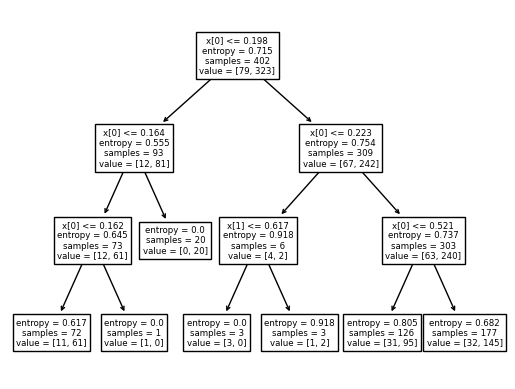

In [103]:
# plot the decision treee
tree.plot_tree(model)

[Text(0.4583333333333333, 0.875, 'Under_grad <= 0.198\nentropy = 0.715\nsamples = 402\nvalue = [79, 323]\nclass = 0'),
 Text(0.25, 0.625, 'Under_grad <= 0.164\nentropy = 0.555\nsamples = 93\nvalue = [12, 81]\nclass = 0'),
 Text(0.16666666666666666, 0.375, 'Under_grad <= 0.162\nentropy = 0.645\nsamples = 73\nvalue = [12, 61]\nclass = 0'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.617\nsamples = 72\nvalue = [11, 61]\nclass = 0'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 1'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 20\nvalue = [0, 20]\nclass = 0'),
 Text(0.6666666666666666, 0.625, 'Under_grad <= 0.223\nentropy = 0.754\nsamples = 309\nvalue = [67, 242]\nclass = 0'),
 Text(0.5, 0.375, 'city_pop <= 0.617\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]\nclass = 1'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 1'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass 

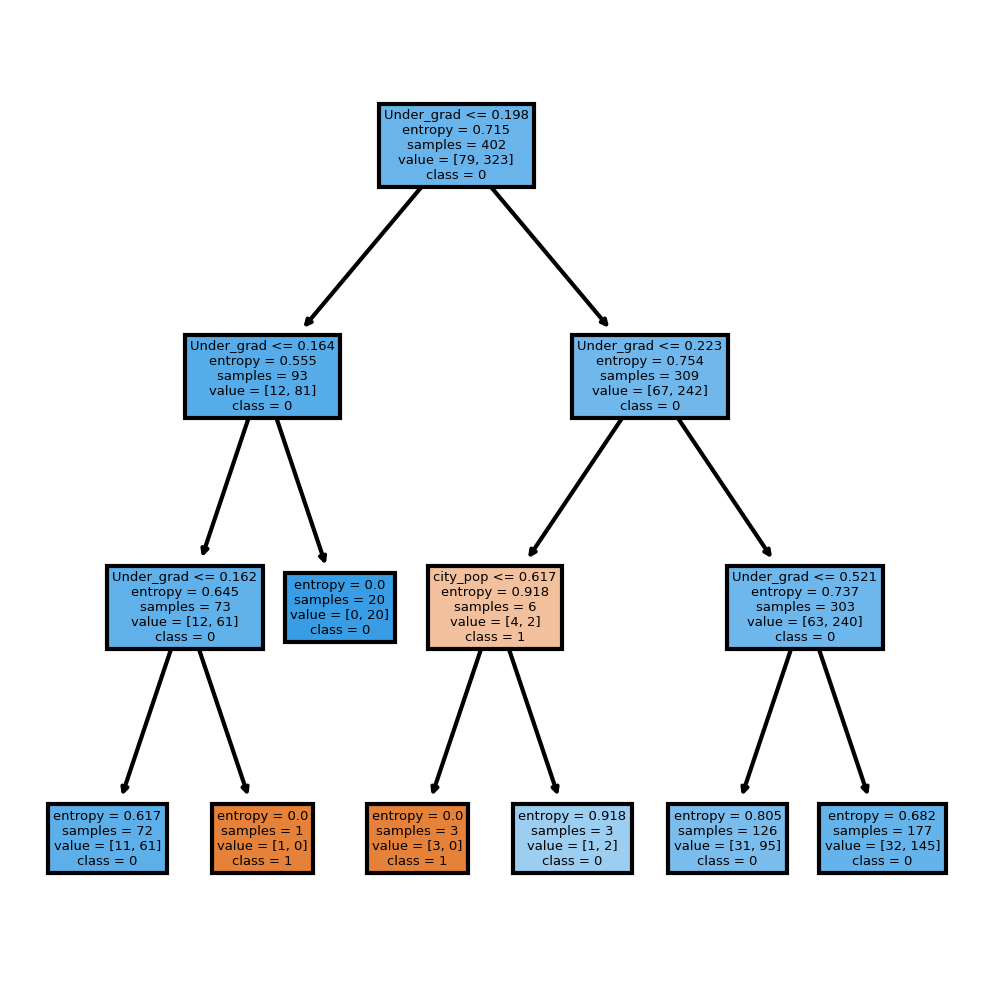

In [104]:
fn = ['Under_grad','city_pop', 'work_exp', 'Urban','Marital_Status_Divorced', 'Marital_Status_Married','Marital_Status_Single']
cn =  ["1","0"]
fig,axes = plt.subplots(nrows=1,ncols= 1,figsize=(4,4),dpi = 300)
tree.plot_tree(model,feature_names =fn,class_names = cn,filled = True)

In [105]:
# prediction on test data
                            # entropy  = 0 ----pure region

preds = model.predict(x_test)

pd.Series(preds).value_counts() 

1.0    195
0.0      3
dtype: int64

In [106]:
pd.crosstab(y_test,preds)

col_0,0.0,1.0
row_0,,
0.0,0,45
1.0,3,150


In [107]:
# accuracy
np.mean(preds == y_test)

0.7575757575757576

# building decision tree classifier (CART ) using Gini Criteria

In [112]:
from sklearn.tree import DecisionTreeClassifier
model_gini= DecisionTreeClassifier(criterion = "gini",max_depth =3)

In [113]:

model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [114]:
# prediction ans computing accuracy

pred = model_gini.predict(x_test)
np.mean(pred == y_test)

0.7525252525252525

In [115]:
seed =7
kfold = KFold(n_splits =10,random_state = seed,shuffle = True)
cart = DecisionTreeClassifier()
num_trees = 50
model = BaggingClassifier(base_estimator =cart,n_estimators =num_trees,random_state  =seed)
results = cross_val_score(model,x,y,cv = kfold)
print(results.mean())

C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` 

0.7316666666666667


In [116]:
model.fit(x_train,y_train)

C:\Users\91863\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=7)

In [117]:
pred = model.predict(x_test)
metrics.accuracy_score(y_test,pred)

0.7323232323232324

In [118]:
np.mean(y_test==pred)

0.7323232323232324

In [166]:
# random Forest classification

from  sklearn.ensemble import RandomForestClassifier
x = array[:,1:7]
y = array[:,7]
num_trees = 100
max_features  = 3
kfold = KFold(n_splits =7,random_state=7,shuffle =True)
model = RandomForestClassifier(n_estimators= num_trees,max_features=max_features)
results = cross_val_score(model,x,y,cv = kfold)
print(results.mean())

0.7399257377369552


In [167]:

model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [168]:
from sklearn import metrics
pred = model.predict(x_test)

metrics.accuracy_score(y_test,pred)


0.7474747474747475

In [169]:
np.mean(y_test==pred)

0.7474747474747475